In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('https://data.illinois.gov/dataset/2c47ae63-3be1-4985-904b-c5e5f4bf79ee/resource/aa78b062-07b2-40b4-8e24-e23778fa2f01/download/data.csv')

In [3]:
data

,game_name,month,total_ticket_sales,total_ticket_sales_count,year,zip_code
0,Lotto,January,680904.0,"169,005",2017,Online
1,Lucky Day Lotto,January,519490.0,"406,786",2017,Online
2,Mega Millions,January,623048.0,"149,777",2017,Online
3,Pick 3,January,117236.0,"7,565",2017,Online
4,Pick3 Fireball,January,59059.0,"3,801",2017,Online
...,...,...,...,...,...,...
995,Pick 4,January,94370.5,"128,838",2017,60154
996,Pick4 Fireball,January,32219.5,"45,066",2017,60154
997,Powerball,January,26680.0,"6,664",2017,60154
998,EZ Match,January,1133.0,"1,133",2017,60155


# Find the lowest zip code

In [4]:
data["zip_code"]

0      Online
1      Online
2      Online
3      Online
4      Online
        ...  
995     60154
996     60154
997     60154
998     60155
999     60155
Name: zip_code, Length: 1000, dtype: object

In [5]:
data["zip_code"].min()

'60002'

# List all entries with a sales amount lower than 60000

In [6]:
data["total_ticket_sales"]

0      680904.0
1      519490.0
2      623048.0
3      117236.0
4       59059.0
         ...   
995     94370.5
996     32219.5
997     26680.0
998      1133.0
999    100650.0
Name: total_ticket_sales, Length: 1000, dtype: float64

In [7]:
data.loc[data["total_ticket_sales"] < 60000]

,game_name,month,total_ticket_sales,total_ticket_sales_count,year,zip_code
4,Pick3 Fireball,January,59059.0,"3,801",2017,Online
8,EZ Match,January,3344.0,"3,344",2017,60002
10,Lotto,January,22696.0,"6,883",2017,60002
11,Lucky Day Lotto,January,27941.0,"11,913",2017,60002
12,Mega Millions,January,21131.0,"7,693",2017,60002
...,...,...,...,...,...,...
992,Mega Millions,January,27513.0,"9,271",2017,60154
994,Pick3 Fireball,January,21003.0,"25,662",2017,60154
996,Pick4 Fireball,January,32219.5,"45,066",2017,60154
997,Powerball,January,26680.0,"6,664",2017,60154


# Decide upon a visualization to show the sales amounts and their corresponding zip codes for first 20 entries in the file
Use any style aside from the default style
Use any color(s) aside from the default color

In [8]:
x1 =data.iloc[0:20]["total_ticket_sales"]
x1

0     680904.0
1     519490.0
2     623048.0
3     117236.0
4      59059.0
5     145418.0
6      80696.0
7     680088.0
8       3344.0
9     364200.0
10     22696.0
11     27941.0
12     21131.0
13     21482.5
14      4899.5
15      9218.0
16      3398.0
17     22431.0
18      2847.0
19    335550.0
Name: total_ticket_sales, dtype: float64

In [9]:
y1 =data.iloc[0:20]["zip_code"]
y1

0     Online
1     Online
2     Online
3     Online
4     Online
5     Online
6     Online
7     Online
8      60002
9      60002
10     60002
11     60002
12     60002
13     60002
14     60002
15     60002
16     60002
17     60002
18     60004
19     60004
Name: zip_code, dtype: object

In [10]:
data.groupby("zip_code")["total_ticket_sales"].sum()

zip_code
60002      500741.0
60004      491127.0
60005      617600.0
60007     1056237.0
60008      537333.0
            ...    
60152      170103.5
60153      558249.0
60154      850911.0
60155      101783.0
Online    2905939.0
Name: total_ticket_sales, Length: 101, dtype: float64

In [11]:
aggregated_data = data.iloc[0:20].groupby("zip_code")["total_ticket_sales"].sum() 

In [12]:
type(aggregated_data)

pandas.core.series.Series

In [13]:
zipcode = aggregated_data.index 
zipcode

Index(['60002', '60004', 'Online'], dtype='object', name='zip_code')

In [14]:
agg_total_ticket_sales= aggregated_data.values
agg_total_ticket_sales

array([ 500741.,  338397., 2905939.])

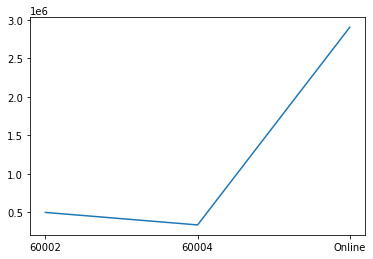

In [15]:
plt.plot(aggregated_data.index, aggregated_data.values)

<AxesSubplot:xlabel='zip_code'>

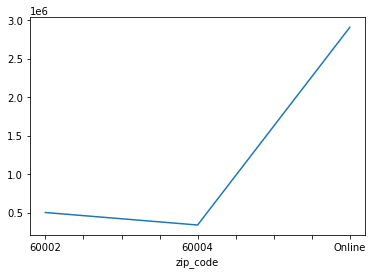

In [16]:
aggregated_data = data.iloc[0:20].groupby("zip_code")["total_ticket_sales"].sum() 
aggregated_data.plot()

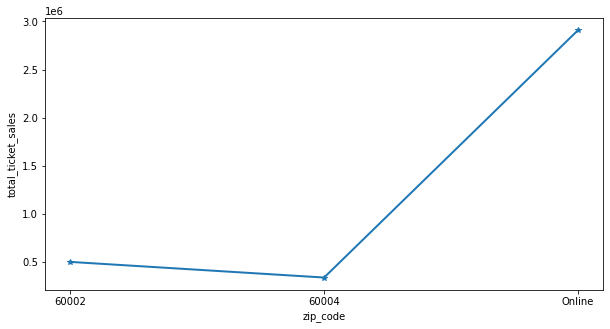

In [17]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(aggregated_data, marker='*', linewidth = 2.0)
ax.set_xlabel("zip_code")
ax.set_ylabel("total_ticket_sales")

ax.set_yscale("linear")

plt.show()

In [18]:
%pip install ipywidgets
import ipywidgets

Note: you may need to restart the kernel to use updated packages.


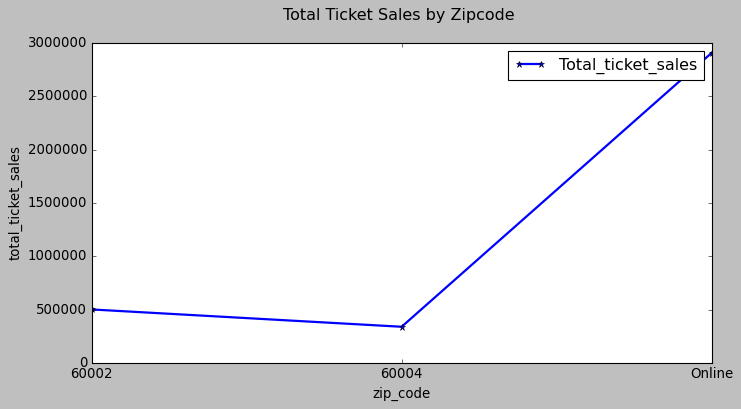

In [19]:
with plt.style.context('classic'):
    
        fig, ax = plt.subplots(figsize=(10,5))

        ax.plot(aggregated_data, marker='*', linewidth = 2.0, label = "Total_ticket_sales")
        ax.set_xlabel("zip_code")
        ax.set_ylabel("total_ticket_sales")
        ax.set_title("Total Ticket Sales by Zipcode \n")
        ax.set_yscale("linear")
        ax.legend()
        plt.show()
    

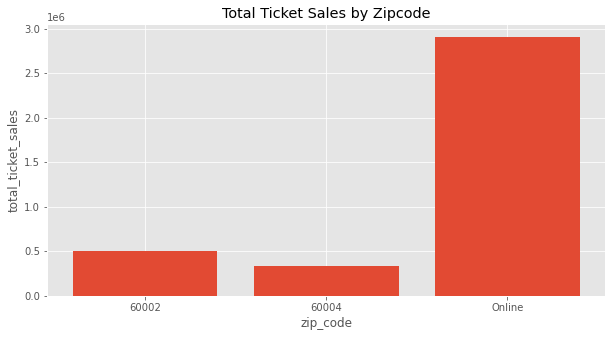

In [24]:
   with plt.style.context('ggplot'):
    
        fig, ax = plt.subplots(figsize=(10,5))

        ax.bar(zipcode, agg_total_ticket_sales)
        ax.set_xlabel("zip_code")
        ax.set_ylabel("total_ticket_sales")
        ax.set_title('Total Ticket Sales by Zipcode')
        ax.set_yscale('linear') 
        plt.show()

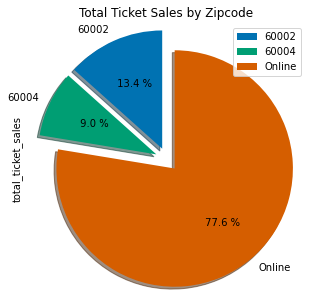

In [21]:
labels = '60002', '60004', 'Online'
explode = (0.1, 0.1, 0.1)

with plt.style.context('seaborn-colorblind'):
    
        fig, ax = plt.subplots(figsize=(5,5))

        ax.pie(aggregated_data,explode = explode,
        labels = labels, autopct ='% 1.1f %%',
        shadow = True, startangle = 90)
        ax.set_ylabel("total_ticket_sales")
        ax.set_title('Total Ticket Sales by Zipcode')
        ax.axis('equal')
        ax.legend()
        plt.savefig("Total_Ticket_Sales_by_Zipcode1.png", bbox_inches='tight')
                    
        plt.show()
        

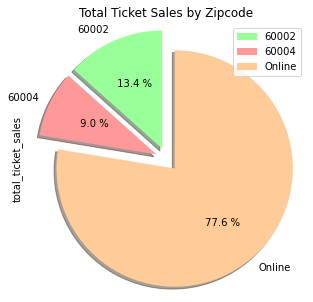

In [22]:
labels = '60002', '60004', 'Online'
explode = (0.1, 0.1, 0.1)
colors = ['#99ff99','#ff9999','#ffcc99']
fig, ax = plt.subplots(figsize=(5,5))

ax.pie(aggregated_data,explode = explode,
labels = labels, colors = colors, autopct ='% 1.1f %%',
shadow = True, startangle = 90)
ax.set_ylabel("total_ticket_sales")
ax.set_title('Total Ticket Sales by Zipcode')
ax.axis('equal')
ax.legend()
plt.savefig("Total_Ticket_Sales_by_Zipcode2.png", bbox_inches='tight')
                    
plt.show()
        